<center><h1>Haidar_Anastasia_HW1</h1></center>
<br>
<center><h1>USC ID: 1163983346</h1></center>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

Get the Vertebral Column Data Set

In [2]:
#In this exercise, we only focus on a binary classification task NO=0 and AB=1.
#focus on column_2C_weka.arff and column_2c.dat
#categories Disk Hernia and Spondylolisthesis were merged into a single category labelled as 'abnormal'. 
#Thus, the second task consists in classifying patients as belonging to one out of two categories: 
#Normal (100 patients) or Abnormal (210 patients)

dat_file = pd.read_csv('./data/vertebral_column_data/column_2C.dat', sep=r"\s+")

#add in header labels
headers = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']

vertebral_col_data = pd.read_csv('./data/vertebral_column_data/column_2C.dat', sep=r"\s+", header=None, names=headers)

#binary classification: change class col to NO=0 and AB=1
vertebral_col_data['binary_class'] = vertebral_col_data['class'].replace({'AB':1, 'NO':0})

#check for missing data and if any, remove rows with missing data
#print(vertebral_col_data.isnull().values.any()) #False

print(vertebral_col_data)


     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0               63.03        22.55                  39.61         40.48   
1               39.06        10.06                  25.02         29.00   
2               68.83        22.22                  50.09         46.61   
3               69.30        24.65                  44.31         44.64   
4               49.71         9.65                  28.32         40.06   
..                ...          ...                    ...           ...   
305             47.90        13.62                  36.00         34.29   
306             53.94        20.72                  29.22         33.22   
307             61.45        22.69                  46.17         38.75   
308             45.25         8.69                  41.58         36.56   
309             33.84         5.07                  36.64         28.77   

     pelvic_radius  degree_spondylolisthesis class  binary_class  
0            98.67              

C:\Users\anast\AppData\Local\Temp\ipykernel_20916\1456345268.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vertebral_col_data['binary_class'] = vertebral_col_data['class'].replace({'AB':1, 'NO':0})


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

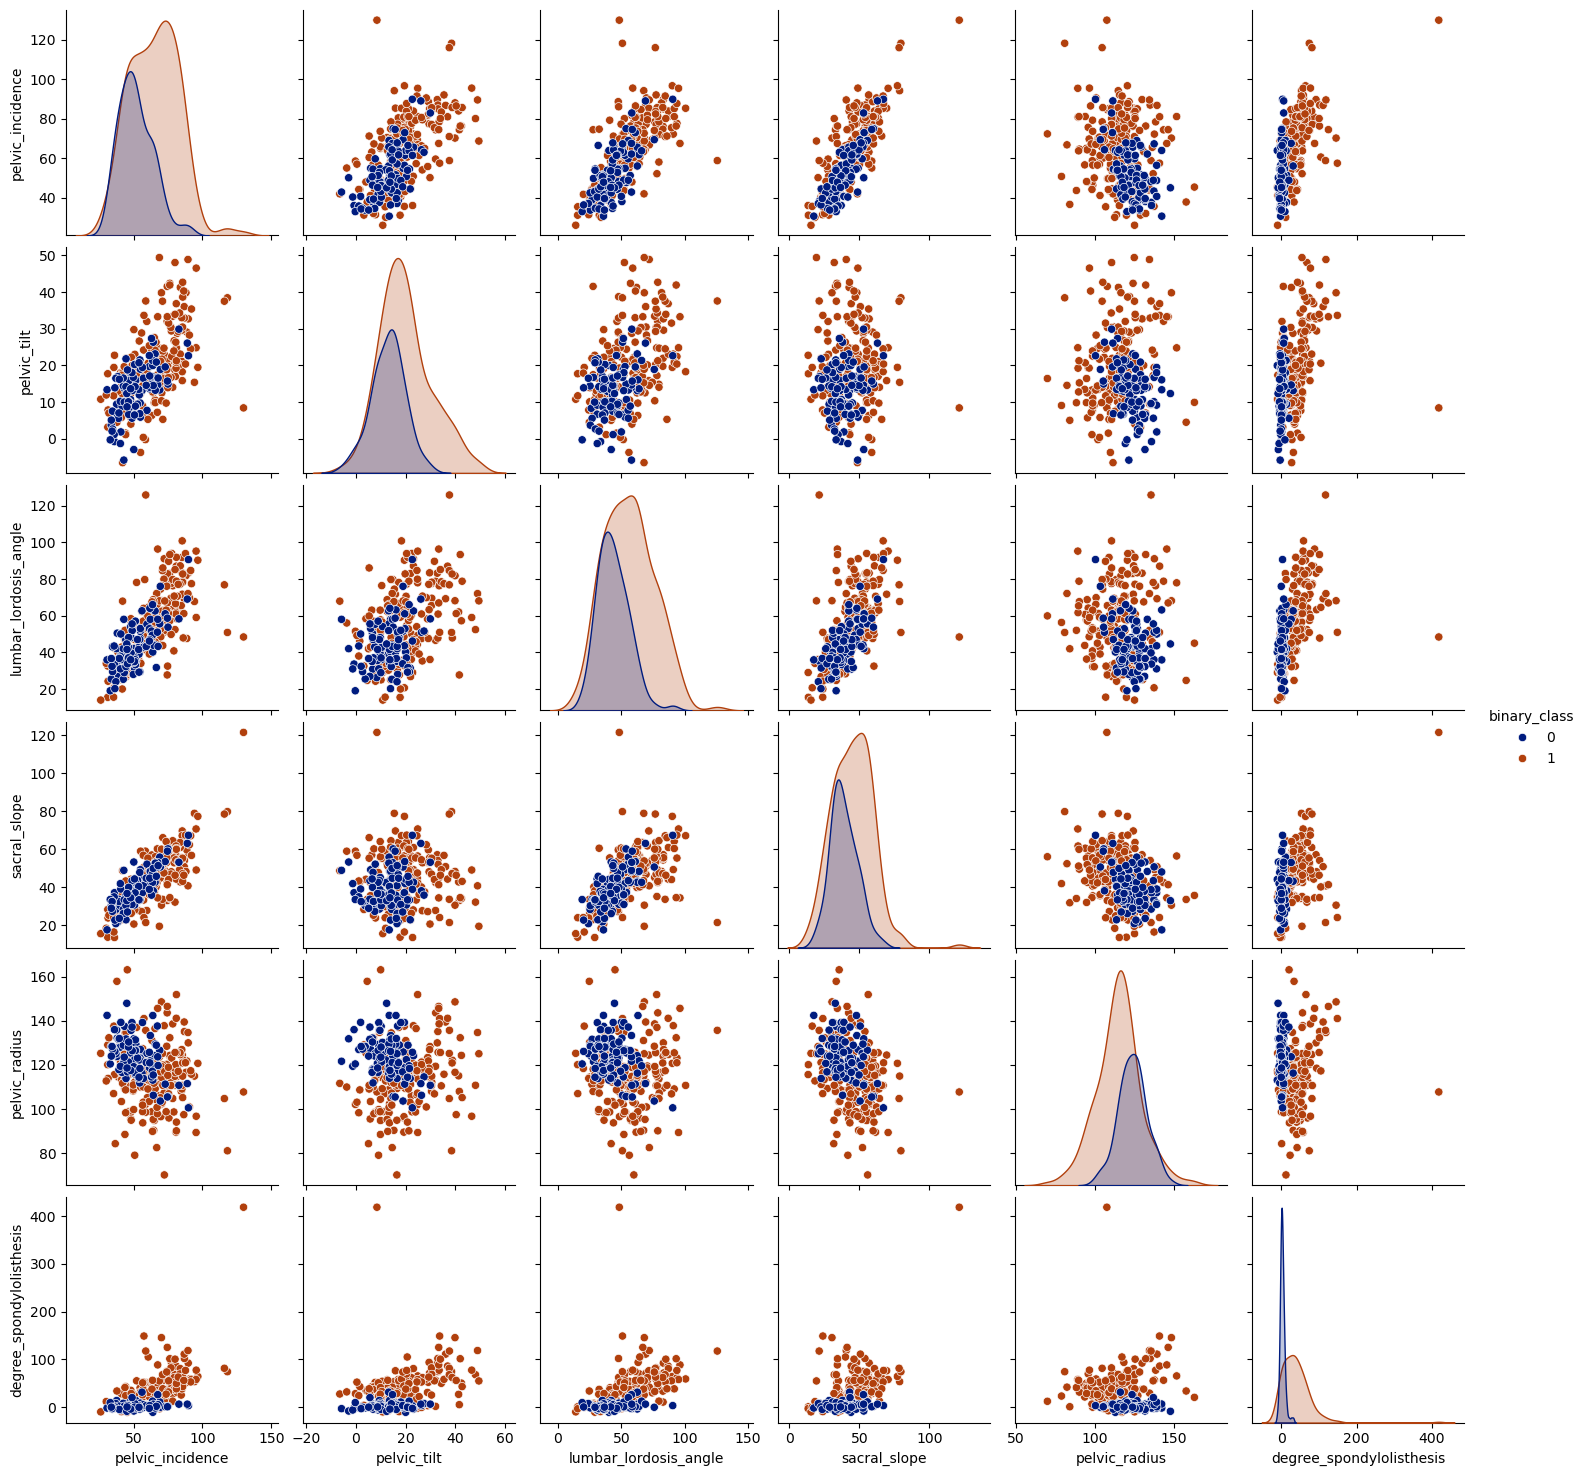

In [3]:
#Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

#scatter_plot = sns.scatterplot(data= vertebral_col_data, hue="binary_class")

features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

sns.pairplot(vertebral_col_data, vars=features, hue='binary_class', kind = 'scatter', palette='dark')


#### ii. Boxplots

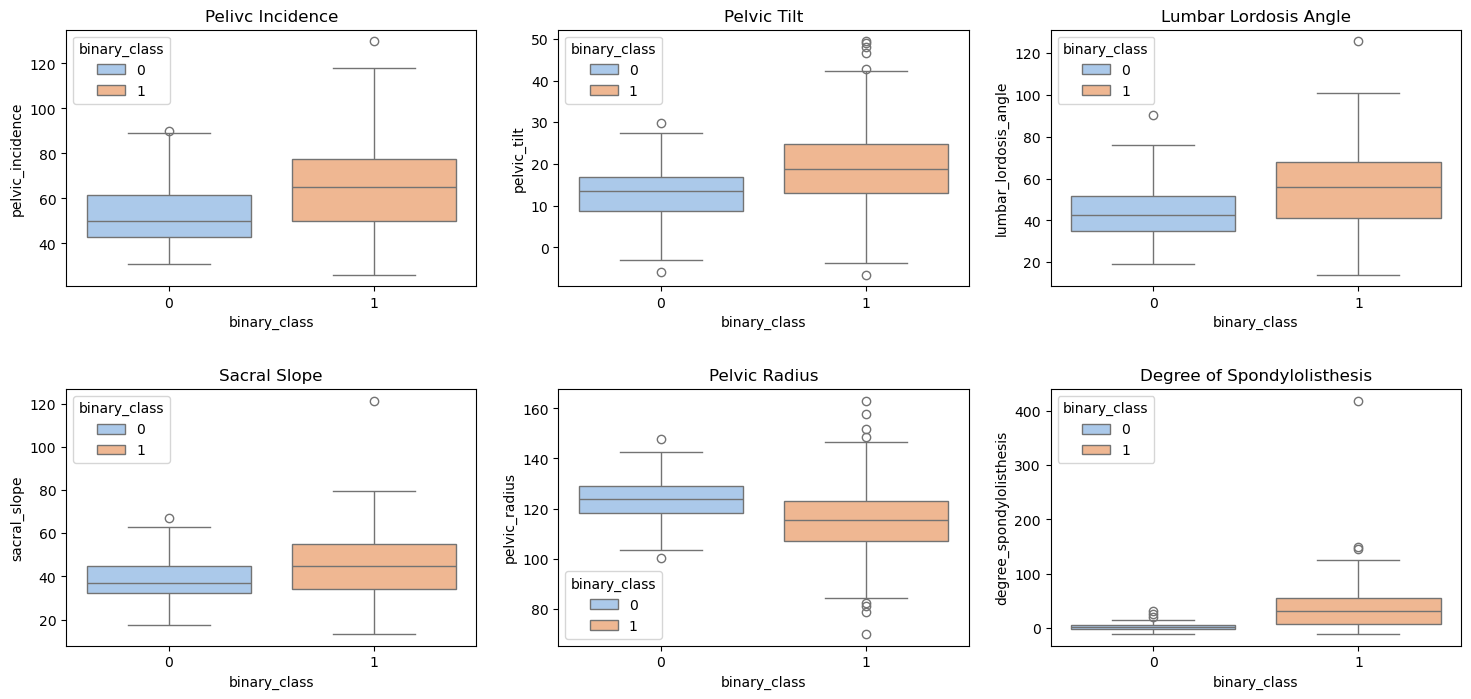

In [4]:
#Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129)

#create and label subplots for each feature
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

sns.boxplot(x='binary_class', y='pelvic_incidence', data=vertebral_col_data, hue='binary_class', palette='pastel', ax=axs[0,0])
axs[0,0].set_title("Pelivc Incidence")

sns.boxplot(x='binary_class', y='pelvic_tilt', data=vertebral_col_data, hue='binary_class', palette='pastel', ax=axs[0,1])
axs[0,1].set_title("Pelvic Tilt")

sns.boxplot(x='binary_class', y='lumbar_lordosis_angle', data=vertebral_col_data, hue='binary_class', palette='pastel', ax=axs[0,2])
axs[0,2].set_title("Lumbar Lordosis Angle")

sns.boxplot(x='binary_class', y='sacral_slope', data=vertebral_col_data, hue='binary_class', palette='pastel', ax=axs[1,0])
axs[1,0].set_title("Sacral Slope")

sns.boxplot(x='binary_class', y='pelvic_radius', data=vertebral_col_data, hue='binary_class', palette='pastel', ax=axs[1,1])
axs[1,1].set_title("Pelvic Radius")

sns.boxplot(x='binary_class', y='degree_spondylolisthesis', data=vertebral_col_data, hue='binary_class', palette='pastel', ax=axs[1,2])
axs[1,2].set_title("Degree of Spondylolisthesis")

#adjust spacing
fig.subplots_adjust(hspace=0.4)


#### iii. Split Data Set

In [5]:
#Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

#start by separating class 0 & 1
class_0_data = vertebral_col_data[vertebral_col_data['binary_class'] == 0].iloc[:70]
class_1_data = vertebral_col_data[vertebral_col_data['binary_class'] == 1].iloc[:140]

#combine both the classes to create training dataset
training_data = pd.concat([class_0_data, class_1_data])
print(training_data)

#do the same for test dataset
class_0_test =vertebral_col_data[vertebral_col_data['binary_class'] == 0].iloc[70:]
class_1_test =vertebral_col_data[vertebral_col_data['binary_class'] == 1].iloc[140:]
test_data = pd.concat([class_0_test, class_1_test])
print(test_data)


     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
210             38.51        16.96                  35.11         21.54   
211             54.92        18.97                  51.60         35.95   
212             44.36         8.95                  46.90         35.42   
213             48.32        17.45                  48.00         30.87   
214             45.70        10.66                  42.58         35.04   
..                ...          ...                    ...           ...   
135             77.12        30.35                  77.48         46.77   
136             88.02        39.84                  81.77         48.18   
137             83.40        34.31                  78.42         49.09   
138             72.05        24.70                  79.87         47.35   
139             85.10        21.07                  91.73         64.03   

     pelvic_radius  degree_spondylolisthesis class  binary_class  
210         127.63              

### (c) Classification

#### i. Euclidean Metric

In [6]:
#Write code for k-nearest neighbors with Euclidean metric (or use a software package).

#define x and y
features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']
x=vertebral_col_data[features]
y=vertebral_col_data['binary_class']

#need to further separate test_data and training_data df's for scikit by our X and Y
x_train=training_data[features]
y_train=training_data['binary_class']

x_test=test_data[features]
y_test=test_data['binary_class']

#need to normalize data b/c each feature is measured on a different scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#fit model (n_neighbors = k) *chose arbitrary K*
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_scaled, y_train)

#predict y
predict_y = knn.predict(x_test_scaled)
print(f"Test Accuracy (k=10): {accuracy_score(y_test, predict_y):.2f}")


Test Accuracy (k=10): 0.82


#### ii. Test Data

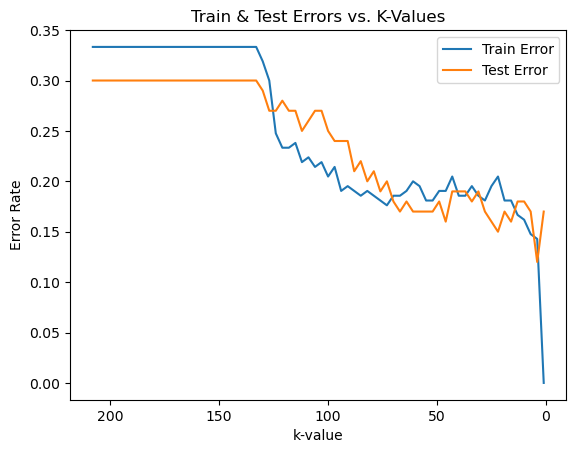

Optimal k-value is: 4 with the lowest test error ( 0.12 )
Confusion Matrix for k*=4: [[22  8]
 [ 4 66]]
True Positive Rate (Recall) for k*=4: 0.9428571428571428
True Negative Rate for k*=4:, 0.7333333333333333
Precision for k*=4: 0.8918918918918919
F1 Score for k*=4: 0.9166666666666666


In [7]:
#Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k
#You are welcome to use smaller increments of k. Which k is the most suitable k among those values? 
#Calculate the confusion matrix, true positive rate, true negative rate, precision,and F1-score when k = k

#use x and y defined in above cell
#list of K values to iterate over
k_values = list(range(208, 0, -3))

#initialize Training and Testing errors/Accuracy
training_error = []
test_error = []

#iterate over full range of k_values
for k in k_values: 
    # Create a KNN classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)

    train_acc = knn.score(x_train_scaled, y_train)
    test_acc = knn.score(x_test_scaled, y_test)

    #add error to list (error = 1 - accuracy)
    training_error.append(1 - train_acc)
    test_error.append(1 - test_acc)

#plot the accuracies
plt.plot(k_values, training_error, label="Train Error")
plt.plot(k_values, test_error, label="Test Error")
plt.gca().invert_xaxis()
plt.xlabel("k-value")
plt.ylabel("Error Rate")
plt.title("Train & Test Errors vs. K-Values")
plt.legend()
plt.show()

#find optimal k-value* (minimizes test error)
optimal_k = k_values[np.argmin(test_error)]
optimal_error = min(test_error)
print("Optimal k-value is:", optimal_k, "with the lowest test error (",optimal_error,")")

#updated KNN based on k=k* (where k*=4)
knn_optimal = KNeighborsClassifier(n_neighbors=4) 
knn_optimal.fit(x_train_scaled, y_train)
predict = knn_optimal.predict(x_test_scaled)

#for k*=4, compute confusion matrix, true positive rate, true negative rate, precision,and F1-score
confusion_matrix = confusion_matrix(y_test, predict)

#extract values from cm
true_neg, false_pos, false_neg, true_pos = confusion_matrix.ravel() 

#true_pos_rate = recall
true_pos_rate = recall_score(y_test, predict)
true_neg_rate = true_neg / (true_neg + false_pos)

precision = precision_score(y_test, predict)
f1_score = f1_score(y_test, predict)

print("Confusion Matrix for k*=4:", confusion_matrix)
print("True Positive Rate (Recall) for k*=4:", true_pos_rate)
print("True Negative Rate for k*=4:,", true_neg_rate)
print("Precision for k*=4:", precision)
print("F1 Score for k*=4:", f1_score)


#### iii. Learning Curve

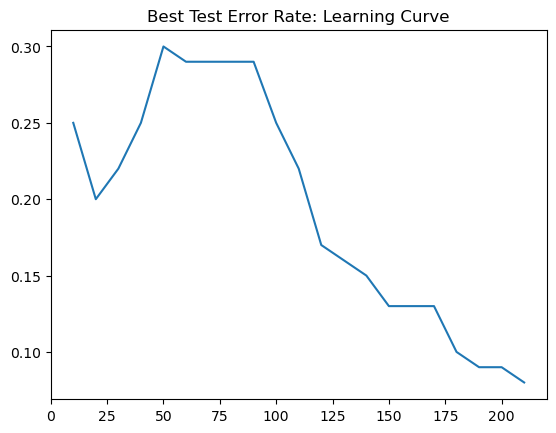

In [8]:
#Since the computation time depends on the size of the training set, one may only use a subset of the training set. 
#Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the
#size of training set is N = {10, 20, 30...210}.4 Note: for each N, select your training set by choosing the first N/3 rows 
#of Class 0 and the first N- N/3 rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, 
#select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, 
#the optimal k is selected from {1, 6, 11, ...196}.This plot is called a Learning Curve.

n_values = list(range(10, 211, 10))

#variables to store error results
min_test_err = []

#training data subsets via class
train_0 = training_data[training_data['binary_class'] == 0]
train_1 = training_data[training_data['binary_class'] == 1]

for n in n_values:
    #samples from each class per N
    n_0 = n//3
    n_1 = n - n_0

    #combine the two new datasets from N
    training_subset = pd.concat([train_0.iloc[:n_0], train_1.iloc[:n_1]]).reset_index()

    #re-define x and y
    x_train_subset = training_subset[features]
    y_train_subset = training_subset['binary_class']

    #loop of range of k-values to calculate optimal k at each N and find test error rate
    k_list = range(1, n, 5)
    subset_test_err = []

    for k in k_list: 
        knn_subsets = KNeighborsClassifier(n_neighbors=k)
        knn_subsets.fit(x_train_subset, y_train_subset)
        accuracy = knn_subsets.score(x_test, y_test)
        #store new error results per k
        subset_test_err.append(1-accuracy)
    
    #find smallest test error for each val of k
    min_error_per_k = min(subset_test_err)
    min_test_err.append(min_error_per_k)
    
#plot the learning curve
plt.plot(n_values, min_test_err)
plt.title("Best Test Error Rate: Learning Curve")
plt.show()


### (d) Other Metrics

#### i. Minkowski Distance.
Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k*) in a table.
Use all of your training data and select the best k when {1, 6,11,...,196}.

##### A. Manhattan Distance with p = 1.

In [9]:
k_values = list(range(1, 197, 5))

manhat_test_errors =[]
manhat_train_errors = []

for k in k_values: 
    #manhattan distance with p = 1 using distancemetric
    manhat_knn = KNeighborsClassifier(n_neighbors = k, metric = "manhattan", p=1)
    manhat_knn.fit(x_train_scaled, y_train)
    manhat_test_err = 1 - manhat_knn.score(x_test_scaled, y_test)
    manhat_train_err =  1 - manhat_knn.score(x_train_scaled, y_train)
    manhat_test_errors.append(manhat_test_err)
    manhat_train_errors.append(manhat_train_err)

#find k vals associated with the test errors and print as table
manhat_results = pd.DataFrame({'k': k_values, 'test_error': manhat_test_errors})
#print(manhat_results)

#find row with minimum test error to identify best k value and print
lowest_err = manhat_results.loc[manhat_results['test_error'].idxmin()]

#store best k value as its own variable
manhat_k = lowest_err['k']
manhat_lowest_err = lowest_err['test_error']

print("Best Mahattan distance k:", manhat_k, "Lowest test error:", manhat_lowest_err)


Best Mahattan distance k: 6.0 Lowest test error: 0.14


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [10]:
#minkowski distance with changing p using optimal k from mahattan distance calc (k* = 6)
#pull p values from log10(p) in {0.1, 0.2, 0.3, ... ,1}
log_p_vals = np.arange(0.1, 1.1, 0.1)
p_vals = 10**log_p_vals

#set test error list
p_test_errors = []
p_train_errors = []

#loop over all p values
for p in p_vals: 
    #minkowski distance with log10(p)
    p_knn = KNeighborsClassifier(n_neighbors = 6, metric = "minkowski", p=p)
    p_knn.fit(x_train_scaled, y_train)
    p_test_err = 1 - p_knn.score(x_test_scaled, y_test)
    p_test_errors.append(p_test_err)
    p_train_err = 1 - p_knn.score(x_train_scaled, y_train)
    p_train_errors.append(p_train_err)

#creat df with all pvals and test error
p_results = pd.DataFrame({'log10(p)': log_p_vals, 'test_error': p_test_err})
#find best log10(p) via smallest test err row
best_p = p_results.loc[p_results['test_error'].idxmin()]

#store best k value as its own variable
minkowski_p = best_p['log10(p)'] 
minkowski_lowest_err = best_p['test_error']

print("Best p for log10(p):", minkowski_p , "Lowest test error:", minkowski_lowest_err)


Best p for log10(p): 0.1 Lowest test error: 0.17000000000000004


##### C. Chebyshev Distance With p -> infinity.

In [11]:
#minikowski, which becomes Chebyshev Distance with p to infinity
k_values = list(range(1, 197, 5))

#set test error list
cheb_test_errors = []
cheb_train_errors = []
for k in k_values: 
    #chebyshev distance
    chebyshev_knn = KNeighborsClassifier(n_neighbors=k, metric="chebyshev")
    chebyshev_knn.fit(x_train_scaled, y_train)
    cheb_test_err = 1 - chebyshev_knn.score(x_test_scaled, y_test)
    cheb_test_errors.append(cheb_test_err)
    cheb_train_err = 1 - chebyshev_knn.score(x_train_scaled, y_train)
    cheb_train_errors.append(cheb_train_err)

#creat df with all k and test error
cheb_results = pd.DataFrame({'k': k_values, 'test_error': cheb_test_err})

#find best k via smallest test err row
best_cheb_k = cheb_results.loc[cheb_results['test_error'].idxmin()]

#store best k value as its own variable
cheb_k = best_cheb_k['k'] 
cheb_lowest_err = best_cheb_k['test_error']

print("Best Chebyshev distance k:", cheb_k , "Lowest test error:", cheb_lowest_err)


Best Chebyshev distance k: 1.0 Lowest test error: 0.30000000000000004


#### ii. Mahalanobis Distance.

In [12]:
#Mahalanobis Distance requires inverting the covariance matrix of the data. When the covariance matrix
#is singular or ill-conditioned, the data live in a linear subspace of the feature space. In this case, the features
#have to be transformed into a reduced feature set in the linear subspace, which is equivalent to using a
#pseudoinverse instead of an inverse.

#copilot: how to take pseudoinverse using numpy
V = np.cov(x_train_scaled.T)
VI = np.linalg.pinv(V)  #pseudoinverse

#set test err list
mah_test_err = []
mah_train_errors =[]
#loop thorugh k vals
k_values = list(range(1, 197, 5))

for k in k_values:
    #knn with Mahalanobis distance
    mah_knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': VI})
    mah_knn.fit(x_train_scaled, y_train)
    test_err = 1 - mah_knn.score(x_test_scaled, y_test)
    mah_test_err.append(test_err)
    mah_train_err = 1 - mah_knn.score(x_train_scaled, y_train)
    mah_train_errors.append(mah_train_err)

#creat df with all k and test error
mah_results = pd.DataFrame({'k': k_values, 'test_error': mah_test_err})

#find best k via smallest test err row
best_k = mah_results.loc[mah_results['test_error'].idxmin()]

#store best k value as its own variable
mah_k = best_k['k'] 
mah_lowest_err = best_k['test_error']

print("Best Mahalanobis distance k:", mah_k , "Lowest test error:", mah_lowest_err)


Best Mahalanobis distance k: 1.0 Lowest test error: 0.17000000000000004


In [13]:
#summary of best k and test errors

summary_results = pd.DataFrame({'Distance': ["Euclidean", "Manhattan", "Minkowski (p)", "Chebyshev", "Mahalanobis"], 'Best k value': [optimal_k, manhat_k, minkowski_p, cheb_k, mah_k], 'Test Error': [optimal_error, manhat_lowest_err, minkowski_lowest_err, cheb_lowest_err, mah_lowest_err]
             })
print(summary_results)


        Distance  Best k value  Test Error
0      Euclidean           4.0        0.12
1      Manhattan           6.0        0.14
2  Minkowski (p)           0.1        0.17
3      Chebyshev           1.0        0.30
4    Mahalanobis           1.0        0.17


### (e) Weighted Decision

In [14]:
#The majority polling decision can be replaced by weighted decision, in which the
#weight of each point in voting is inversely proportional to its distance from the
#query/test data point. In this case, closer neighbors of a query point will have
#a greater influence than neighbors which are further away. Use weighted voting
#with Euclidean, Manhattan, and Chebyshev distances and report the best test
#errors when k = {1; 6; 11; 16, ..., 196}

#loop thorugh k vals
k_values = list(range(1, 197, 5))

#distance metrics
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

results = {}

for metric in distance_metrics:
    test_errors=[]

    for k in k_values: 
        knn_weighted = KNeighborsClassifier(n_neighbors=k, metric=metric, weights="distance")
        knn_weighted.fit(x_train_scaled, y_train)
        test_weighted_err = 1 - knn_weighted.score(x_test_scaled, y_test)
        test_errors.append(test_weighted_err)

    weighted_results = pd.DataFrame({'metric': metric, 'k': k_values, 'test_errors': test_errors})
    results[metric] = weighted_results
    #print(weighted_results)

    best_k_per_metric = weighted_results.loc[[weighted_results['test_errors'].idxmin()]]
    print(f"Best k for {metric}:")
    print(best_k_per_metric)

Best k for euclidean:
      metric   k  test_errors
4  euclidean  21         0.15
Best k for manhattan:
      metric  k  test_errors
1  manhattan  6         0.15
Best k for chebyshev:
      metric  k  test_errors
0  chebyshev  1         0.15


### (f) Lowest Training Error Rate?

In [15]:
#find lowest training error across all tests
#pull existing training error [] vars

all_train_errors = {"euclidean": training_error, "manhattan": manhat_train_errors, "minkowski_p": p_train_errors, "mahalanobis": mah_train_errors, "chebyshev": cheb_train_errors}

#find the lowest training error rate and identify metric
lowest_train_err = float('inf')
metric = None
index = None

for metric_name, errors in all_train_errors.items():
    min_err = min(errors)
    min_index = errors.index(min_err)
    if min_err < lowest_train_err:
        lowest_train_err = min_err
        metric = metric_name
        index = errors.index(min_err)

print("Lowest training error:", lowest_train_err, "Metric:", metric)


Lowest training error: 0.0 Metric: euclidean


REFERENCES:

https://www.geeksforgeeks.org/python/reading-dat-file-in-python/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://seaborn.pydata.org/generated/seaborn.color_palette.html

https://seaborn.pydata.org/generated/seaborn.boxplot.html

https://www.datacamp.com/tutorial/python-boxplots

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py

https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

https://www.geeksforgeeks.org/python/pandas-concat-function-in-python/

https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

https://github.com/chingisooinar/KNN-python-implementation/blob/main/k_nearest_neighbors_from_scratch.ipynb

https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbor-algorithm-in-python/  ##useful for scaling

https://stackoverflow.com/questions/77525878/using-knn-to-find-optimal-value-of-k-for-accuracy

#Copilot: "How to iterate over multiple k values in KNN?"

https://stackoverflow.com/questions/52687493/find-the-training-and-test-error-in-my-self-implemented-knn-algorithm

https://www.geeksforgeeks.org/machine-learning/how-to-find-the-optimal-value-of-k-in-knn/

https://numpy.org/doc/2.1/reference/generated/numpy.argmin.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

https://www.kaggle.com/code/kadriyeaksakal/confusion-matrix-with-knn-algorithm

https://www.geeksforgeeks.org/machine-learning/confusion-matrix-machine-learning/

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

https://www.dataquest.io/blog/learning-curves-machine-learning/

https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html

https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html

https://www.dataquest.io/blog/learning-curves-machine-learning/

https://www.datacamp.com/tutorial/tutorial-learning-curves

https://scikit-learn.org/stable/modules/learning_curve.html

https://www.geeksforgeeks.org/python/division-operators-in-python/

https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

https://www.datacamp.com/tutorial/manhattan-distance

https://stackoverflow.com/questions/67215974/knn-prediction-with-l1-manhattan-distance

https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html

https://www.datacamp.com/tutorial/chebyshev-distance

https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics

https://www.geeksforgeeks.org/machine-learning/weighted-k-nn/
